<a href="https://colab.research.google.com/github/Yutong-Lu/Datathon-1/blob/main/Yutong_Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv


In [31]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon#1-Dataset2.csv']))

Exploratory Data Analysis

In [ ]:
print(df.shape)
df.head()
df.info()

(1465, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                1465 non-null   int64
 1   Gender             1465 non-null   int64
 2   Air Pollution      1465 non-null   int64
 3   Alcohol Usage      1465 non-null   int64
 4   Genetic Risk       1465 non-null   int64
 5   Lung Disease       1465 non-null   int64
 6   Obesity            1465 non-null   int64
 7   Smoking            1465 non-null   int64
 8   Passive Smoker     1465 non-null   int64
 9   Chest Pain         1465 non-null   int64
 10  Coughing of Blood  1465 non-null   int64
 11  Severity           1465 non-null   int64
dtypes: int64(12)
memory usage: 137.5 KB


Upon inspection, we have 1465 observations with 12 variables and all 12 variables are with the type int64.

In [ ]:
# Display summary statistics
print(df.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

In [28]:
# Check for missing values in each column
print(df.isnull().sum())

# based on https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10355424/, 0-low, 1-moderate, 2-high, 3-healthy
# Create a new binary outcome for severity
df['Cancer Status'] = df['Severity'] != 3

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# correlation cofficient
corr=df.corr()
round(corr,2)

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
Age,1.00,-0.10,0.04,0.13,0.03,0.08,0.01,0.05,-0.00,0.01,0.04,0.04
Gender,-0.10,1.00,-0.17,-0.16,-0.16,-0.14,-0.09,-0.17,-0.14,-0.17,-0.11,-0.07
Air Pollution,0.04,-0.17,1.00,0.51,0.43,0.38,0.38,0.32,0.41,0.39,0.37,0.38
Alcohol Usage,0.13,-0.16,0.51,1.00,0.71,0.59,0.55,0.49,0.51,0.60,0.56,0.22
Genetic Risk,0.03,-0.16,0.43,0.71,1.00,0.78,0.72,0.57,0.64,0.80,0.68,-0.03
Lung Disease,0.08,-0.14,0.38,0.59,0.78,1.00,0.63,0.60,0.61,0.77,0.67,-0.10
Obesity,0.01,-0.09,0.38,0.55,0.72,0.63,1.00,0.53,0.70,0.69,0.81,0.07
Smoking,0.05,-0.17,0.32,0.49,0.57,0.60,0.53,1.00,0.76,0.66,0.60,0.01
Passive Smoker,-0.00,-0.14,0.41,0.51,0.64,0.61,0.70,0.76,1.00,0.71,0.69,0.05
Chest Pain,0.01,-0.17,0.39,0.60,0.80,0.77,0.69,0.66,0.71,1.00,0.74,-0.00


<Axes: >

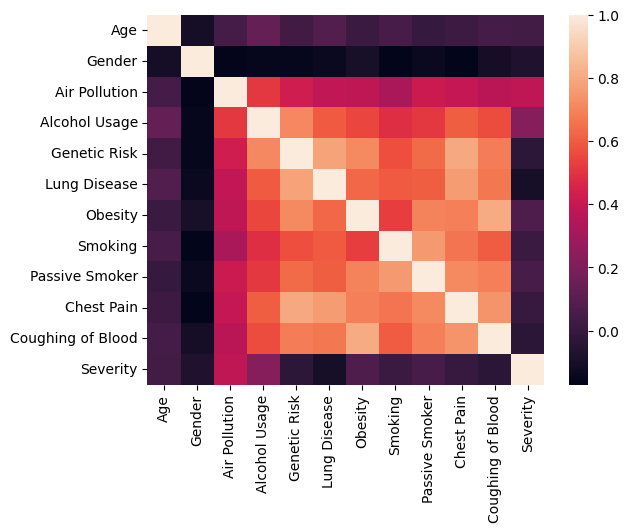

In [33]:
sns.heatmap(corr)

Research Question 1: KNN

In [ ]:
# import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

In [ ]:
# Analysis on cancer severity only for those people who have cancer

canceronly = df[df['Severity'] != 3]

X = canceronly[['Age', 'Alcohol Usage', 'Genetic Risk', 'Air Pollution',
                'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker',
                'Chest Pain', 'Coughing of Blood']]
y = canceronly['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[46  7  2]
 [ 0 61  2]
 [ 0  3 79]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        55
           1       0.86      0.97      0.91        63
           2       0.95      0.96      0.96        82

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.93      0.93       200



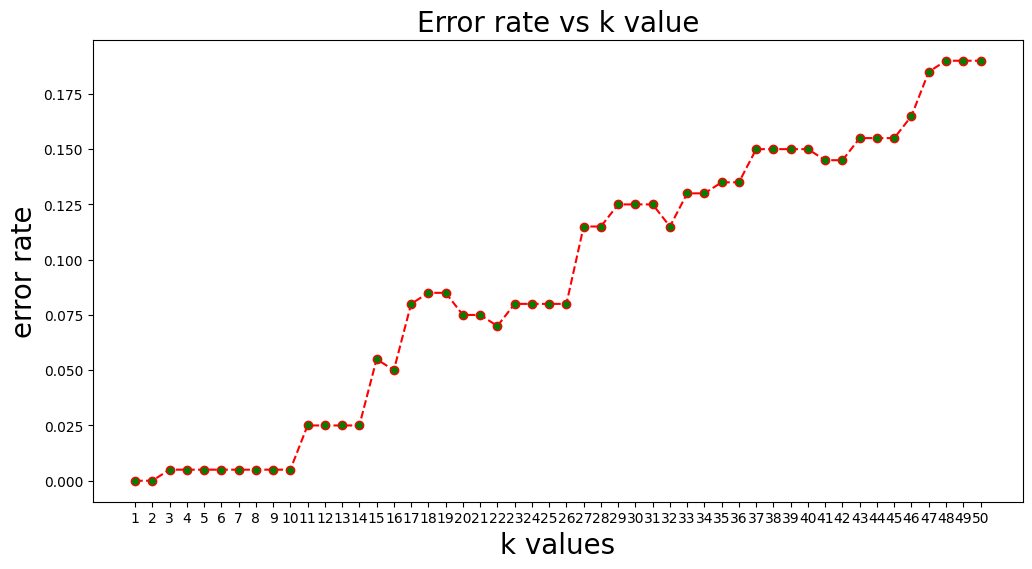

In [34]:
error_rate =[] # list that will store the accuracy score value of k
for i in range (1, 51):  #Took the range of k from 1 to 30
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

#plotting the accuracy vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1, 51),error_rate,marker="o",
         markerfacecolor="green",
         linestyle="dashed",color="red")
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1, 51))
plt.show()

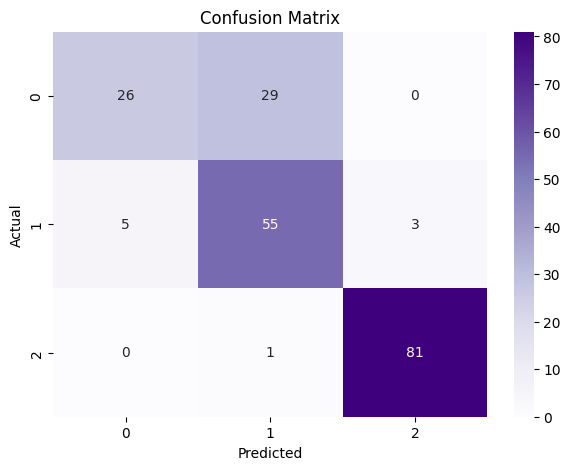

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = canceronly['Severity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes),
            cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[ 71  58]
 [ 21 217]]
              precision    recall  f1-score   support

       False       0.77      0.55      0.64       129
        True       0.79      0.91      0.85       238

    accuracy                           0.78       367
   macro avg       0.78      0.73      0.74       367
weighted avg       0.78      0.78      0.77       367



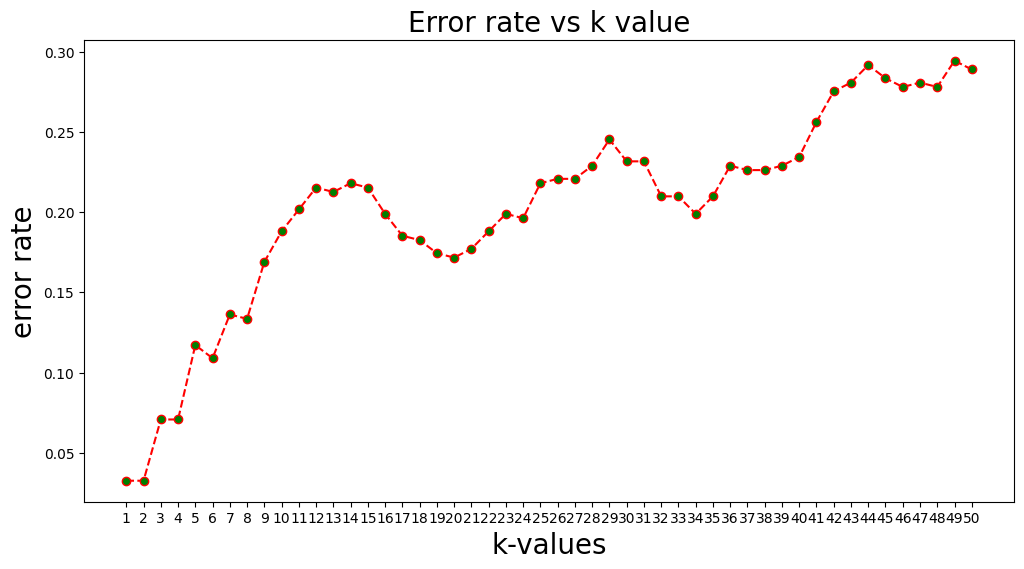

In [ ]:
# Analysis on Cancer status for all observations

X = df[['Age', 'Alcohol Usage', 'Obesity', 'Smoking']]
y = df['Cancer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error_rate =[] # list that will store the accuracy score value of k
for i in range (1, 51):  # Took the range of k from 1 to 50
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

#plotting the accuracy vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1, 51),error_rate,marker="o",
         markerfacecolor="green",
         linestyle="dashed",color="red")
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k-values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1, 51))
plt.show()

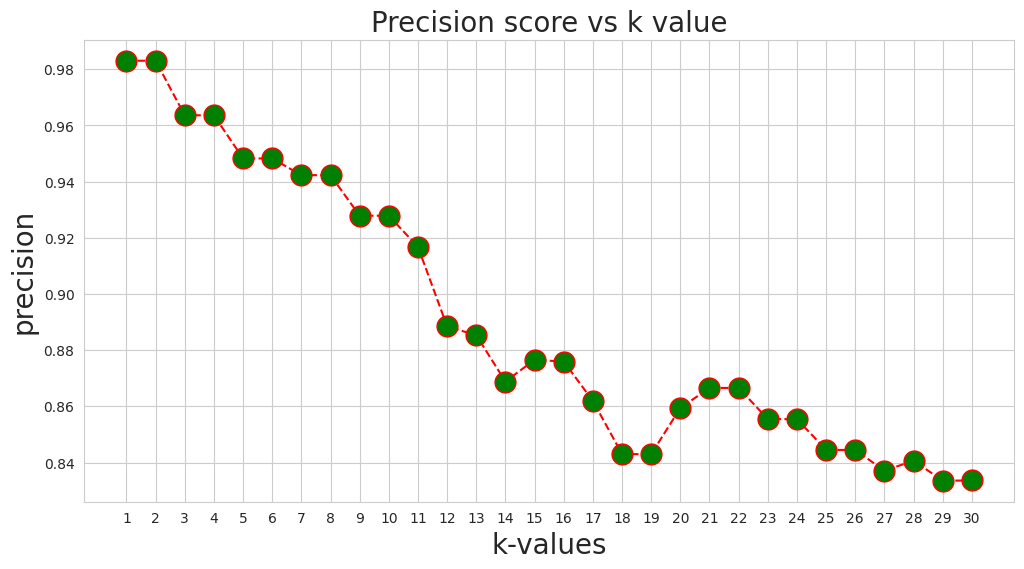

Research Question 2: K-Means Clustering

In [ ]:
# Check for missing values in the dataset
print(df.isna().sum())

# Display the data types of each column
df.dtypes

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


Age                  int64
Gender               int64
Air Pollution        int64
Alcohol Usage        int64
Genetic Risk         int64
Lung Disease         int64
Obesity              int64
Smoking              int64
Passive Smoker       int64
Chest Pain           int64
Coughing of Blood    int64
Severity             int64
dtype: object

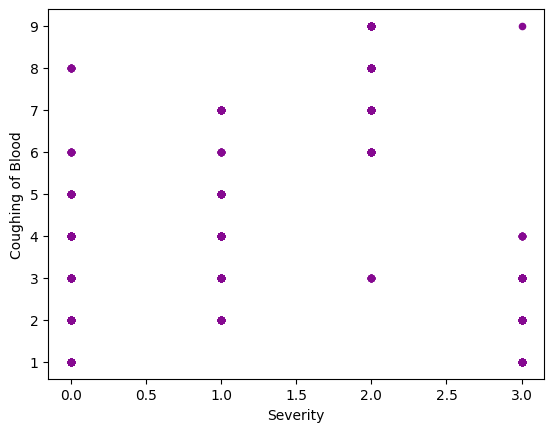

In [ ]:
features = ['Severity', 'Coughing of Blood']
df[features].plot.scatter(x=features[0], y=features[1], color='#860991')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


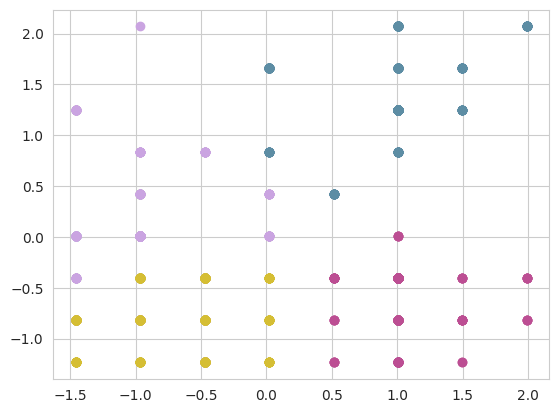

[0 3 2 ... 1 1 1]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#caa4e1', '#bc4e93', '#5d8da4', '#d5be34']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

# Choose two features for clustering and visualization
features = ['Air Pollution', 'Coughing of Blood']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Here, we're specifying 4 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 4)

In [ ]:
# Check how many labels are the same as lung cancer severity
sum(label == df['Severity'])

731